In [1]:
from zipfile import ZipFile
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
file_name = 'datasets/dc-residential-properties.zip'

with ZipFile(file_name) as zip:
    zip.printdir()
    
    zip.extract("DC_Properties.csv")

    
    

File Name                                             Modified             Size
raw_residential_data.csv                       2018-07-31 18:42:50     23812550
raw_census_tracts_in_2010.csv                  2018-07-31 18:42:48        59729
DC_Properties.csv                              2018-07-31 18:42:52     55375653
raw_condominium_data.csv                       2018-07-31 18:42:50      7188540
Census_Tracts_in_2010.shp                      2018-07-31 18:42:48       670188
Census_Tracts_in_2010.dbf                      2018-07-31 18:42:48       184936
Census_Tracts_in_2010.shx                      2018-07-31 18:42:48         1532
raw_address_points.csv                         2018-07-31 18:42:52     74031051


In [3]:
properties_df = pd.read_csv("DC_Properties.csv")
properties_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
properties_df['PRICE'].shape

(158957,)

In [5]:
properties_df['PRICE'].isna().sum()

60741

In [6]:
properties_df['PRICE'].head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [7]:
properties_df = properties_df.dropna(subset = ['PRICE'])

In [8]:
properties_df['PRICE'].head()

0    1095000.0
2    2100000.0
3    1602000.0
5    1950000.0
7    1050000.0
Name: PRICE, dtype: float64

### Z-Score 

In [9]:
scaler = StandardScaler()

price_z = scaler.fit_transform(properties_df[['PRICE']])

In [10]:
type(price_z)

numpy.ndarray

In [11]:
price_z_col = pd.Series(price_z.reshape(-1))

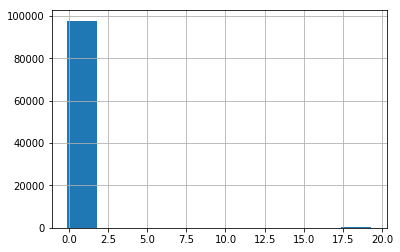

In [12]:
price_z_col.hist()

### Min-Max Scaling

In [13]:
min_max = MinMaxScaler()

In [14]:
price_mm = min_max.fit_transform(properties_df[['PRICE']])

In [15]:
price_mm[:10]

array([[0.00796783],
       [0.01528077],
       [0.01165704],
       [0.01418929],
       [0.00764038],
       [0.01040548],
       [0.00964144],
       [0.00902293],
       [0.00430954],
       [0.00024181]])

In [16]:
price_mm_col = pd.Series(price_mm.reshape(-1))

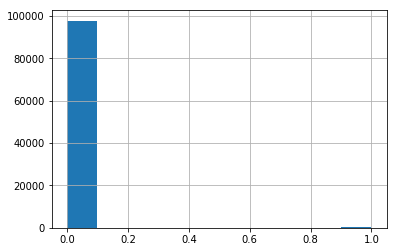

In [17]:
price_mm_col.hist()

In [18]:
properties_df['PRICE'].describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

### Dropping outliers 

Since we see that some values are 17.5 deviations above the mean, we're going to consider those values outliers and drop them in order to get a better understanding of the rest of our data. 

In [19]:
prop_normal = properties_df.drop((properties_df[properties_df['PRICE'] > 1800000].index))

In [20]:
# we dropped about 2,000 properties that were above $1800000 or the top 2% of our data
len(prop_normal)

95732

In [21]:
#normalized min_mix

price_mm_norm = min_max.fit_transform(prop_normal[['PRICE']])
price_mm_norm_col = pd.Series(price_mm_norm.reshape(-1))

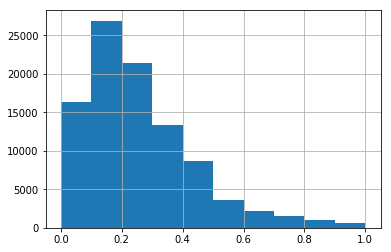

In [22]:
price_mm_norm_col.hist()

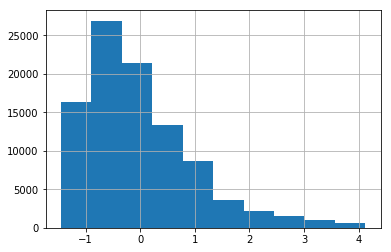

In [23]:
#normalized z-score
price_z_norm = scaler.fit_transform(prop_normal[['PRICE']])
price_z_norm_col = pd.Series(price_z_norm.reshape(-1))
price_z_norm_col.hist()

In [26]:
prop_normal["PRICE"].mean()

469179.455500773

We can see that that most houses (outliers excluded) are about 0.5-0.9 standard deviations below the mean price of $469,179. 